In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import category_encoders as ce 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression 
from catboost import CatBoostRegressor as cbe

In [2]:
housing = pd.read_csv(r"/kaggle/input/ames-housing-dataset/AmesHousing.csv")
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
housing.nunique().sort_values()

Central Air          2
Street               2
Alley                2
Bsmt Half Bath       3
Paved Drive          3
                  ... 
Bsmt Unf SF       1137
Gr Liv Area       1292
Lot Area          1960
PID               2930
Order             2930
Length: 82, dtype: int64

In [4]:

housing.isna().mean() 

Order             0.000000
PID               0.000000
MS SubClass       0.000000
MS Zoning         0.000000
Lot Frontage      0.167235
                    ...   
Mo Sold           0.000000
Yr Sold           0.000000
Sale Type         0.000000
Sale Condition    0.000000
SalePrice         0.000000
Length: 82, dtype: float64

In [5]:

df_missing = pd.DataFrame(housing.isna().mean())
df_missing = df_missing[df_missing[0]>=0.3]
df_missing.index

housing.drop(columns=df_missing.index, inplace=True)

In [6]:
housing.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',


In [7]:
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [8]:
categorical_columns = housing.select_dtypes(exclude='number').columns.to_list()
numerical_columns = housing.select_dtypes(include='number').columns.to_list()


In [9]:
numerical_columns = [feature for feature in numerical_columns if feature != 'SalePrice']
target = 'SalePrice'

In [10]:
X = housing[numerical_columns+categorical_columns]
y = housing[target]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train_shape:{X_train.shape}")
print(f"X_test_shape:{X_test.shape}")
print(f"y_train_shape:{y_train.shape}")
print(f"y_test_shape:{y_test.shape}")

X_train_shape:(2051, 75)
X_test_shape:(879, 75)
y_train_shape:(2051,)
y_test_shape:(879,)


In [12]:
cbe_model = cbe()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())
    ])

categorical_transformer = Pipeline(steps=[('encoder', ce.OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_columns),
    ("cat", categorical_transformer, categorical_columns)
]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=mutual_info_regression, k=10)),
    ("model", cbe_model)
])
pipeline.fit(X_train, y_train)

Learning rate set to 0.045864
0:	learn: 75530.7561441	total: 57.3ms	remaining: 57.2s
1:	learn: 73238.8204470	total: 59.3ms	remaining: 29.6s
2:	learn: 71022.4409057	total: 61ms	remaining: 20.3s
3:	learn: 68999.7701444	total: 62.8ms	remaining: 15.6s
4:	learn: 66841.9201645	total: 64.7ms	remaining: 12.9s
5:	learn: 64762.7328908	total: 66.2ms	remaining: 11s
6:	learn: 62840.3357625	total: 67.9ms	remaining: 9.63s
7:	learn: 61097.7764827	total: 69.8ms	remaining: 8.66s
8:	learn: 59506.0592817	total: 71.2ms	remaining: 7.83s
9:	learn: 57894.4032564	total: 73ms	remaining: 7.23s
10:	learn: 56329.4546390	total: 74.8ms	remaining: 6.73s
11:	learn: 54875.0117976	total: 76.5ms	remaining: 6.3s
12:	learn: 53431.7910766	total: 78.3ms	remaining: 5.95s
13:	learn: 52086.3367146	total: 80ms	remaining: 5.63s
14:	learn: 50741.5051315	total: 81.6ms	remaining: 5.36s
15:	learn: 49531.3257916	total: 83.2ms	remaining: 5.12s
16:	learn: 48320.1627639	total: 84.9ms	remaining: 4.91s
17:	learn: 47215.7590678	total: 86.7m

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Order', 'PID',
                                                   'MS SubClass',
                                                   'Lot Frontage', 'Lot Area',
                                                   'Overall Qual',
                                                   'Overall Cond', 'Year Built',
                                                   'Year Remod/Add',
                                                   'Mas Vnr Area',
                                                   'BsmtFin SF 1',
                                                   'BsmtFin SF 2',
                                                   'Bsmt Unf SF',
                                                   'Total Bsmt SF',
                                                   '1st Flr SF', '2nd...
                                                   'Exterior 2nd', 'Exter Qual',
                                                   'Exter Cond', 'Foundation',
                                                   'Bsmt Qual', 'Bsmt Cond',
                                                   'Bsmt Exposure',
                                                   'BsmtFin Type 1',
                                                   'BsmtFin Type 2', 'Heating',
                                                   'Heating QC', 'Central Air',
                                                   'Electrical', 'Kitchen Qual',
                                                   'Functional', ...])])),
                ('feature_selection',
                 SelectKBest(score_func=<function mutual_info_regression at 0x7ca82d241240>)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7ca82dc6c8e0>)])

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 733336406.6971
Root Mean Squared Error (RMSE): 27080.1848
Mean Absolute Error (MAE): 17123.8645
R-squared (R2): 0.8957


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

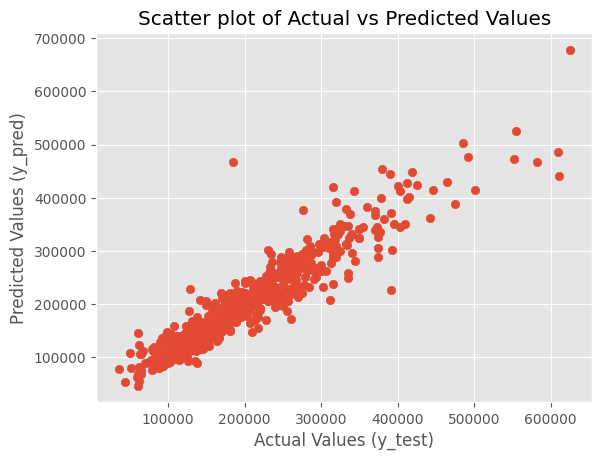

In [15]:
# Assuming y_test and y_pred are arrays or lists containing the actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter plot of Actual vs Predicted Values')
plt.show()